# 📊 Análise Exploratória Completa (EDA)

# Etapa 0: Setup do Caminho de Importação

In [13]:
import sys
from pathlib import Path

# Adiciona o diretório raiz do projeto ao sys.path

In [14]:
ROOT = Path().resolve().parent
sys.path.append(str(ROOT / "src"))
sys.path.append(str(ROOT))

In [15]:
from config import DATA_PATH
from features import criar_variaveis_derivadas

# Etapa 1: Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Etapa 2: Carregamento da base

In [17]:
from src.features import criar_variaveis_derivadas
from src.config import DATA_PATH


In [18]:

df = pd.read_csv(DATA_PATH)
df = criar_variaveis_derivadas(df)

# Etapa 3: Verificação do balanceamento de classes

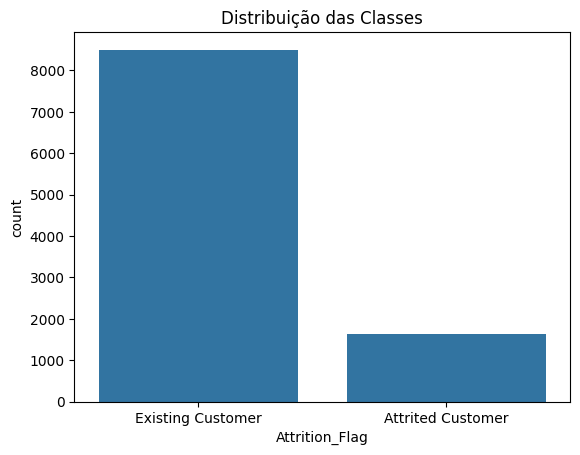

In [19]:
sns.countplot(data=df, x="Attrition_Flag")
plt.title("Distribuição das Classes")
plt.show()

# Etapa 4: Distribuição de variáveis numéricas

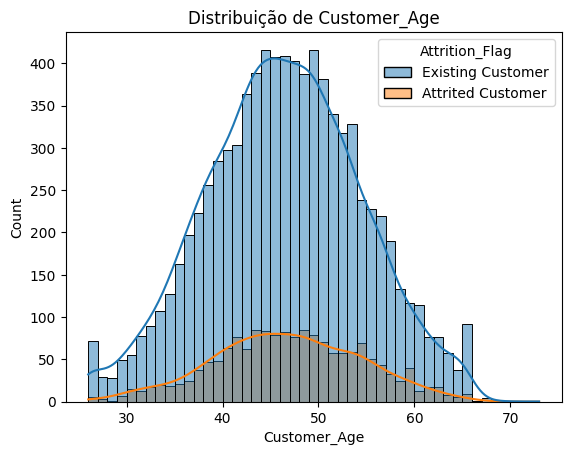

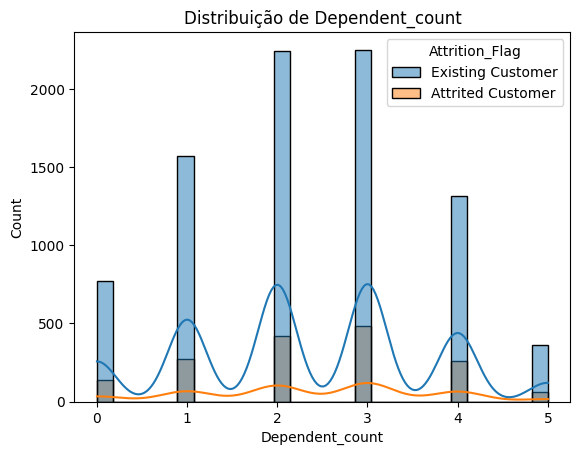

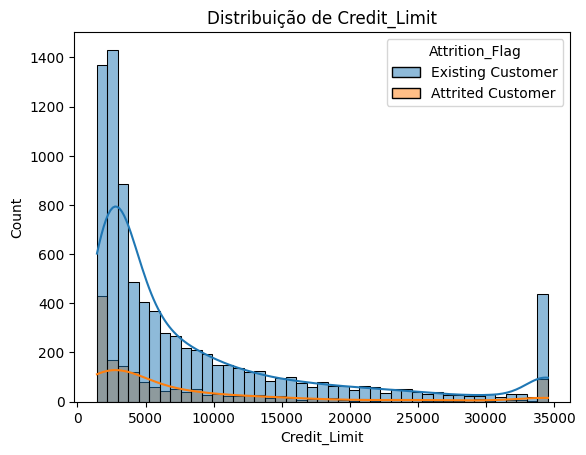

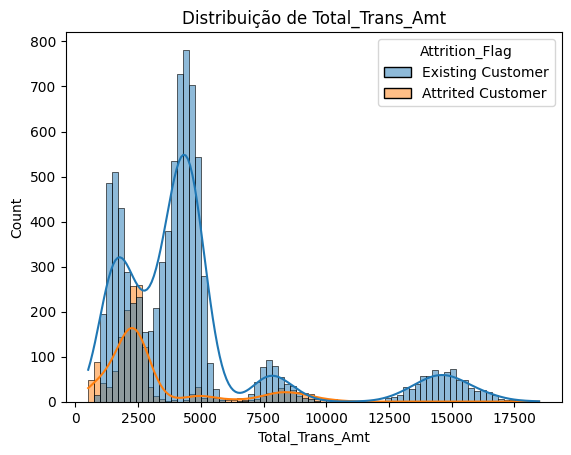

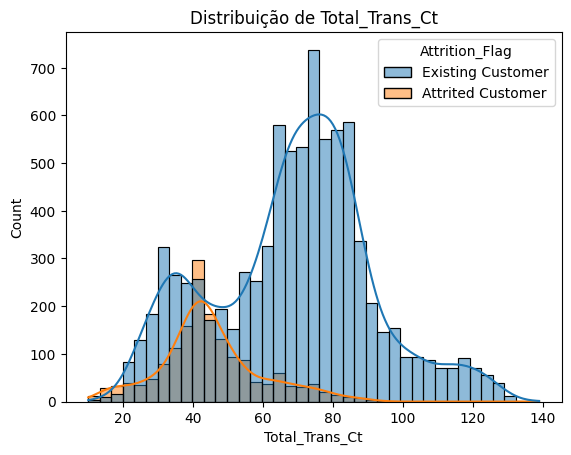

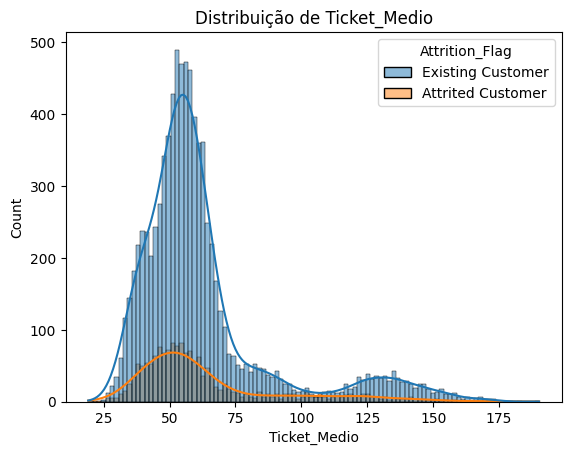

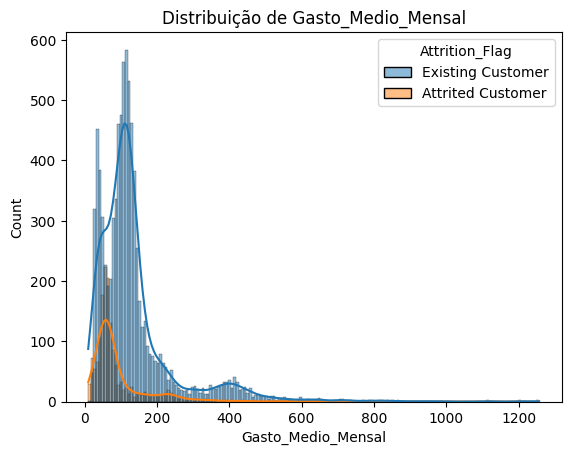

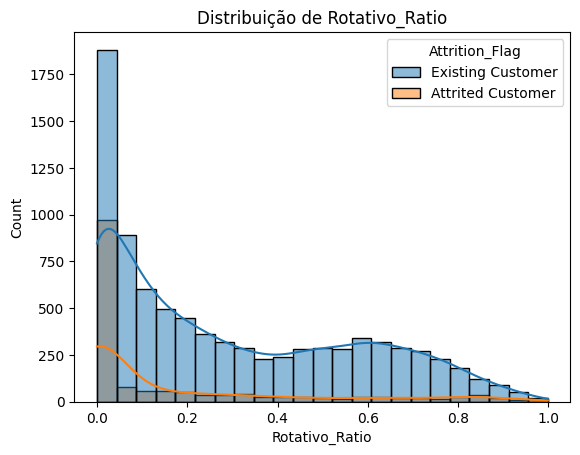

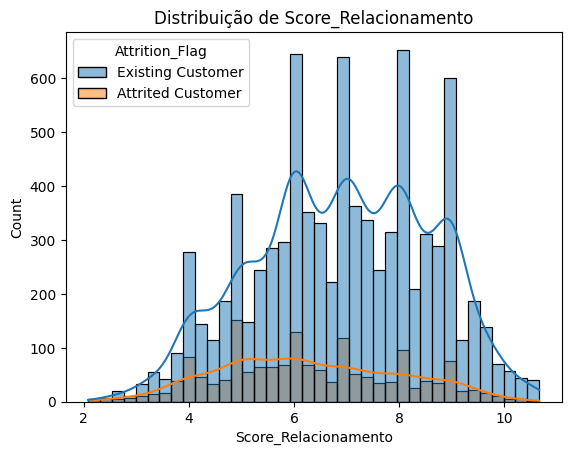

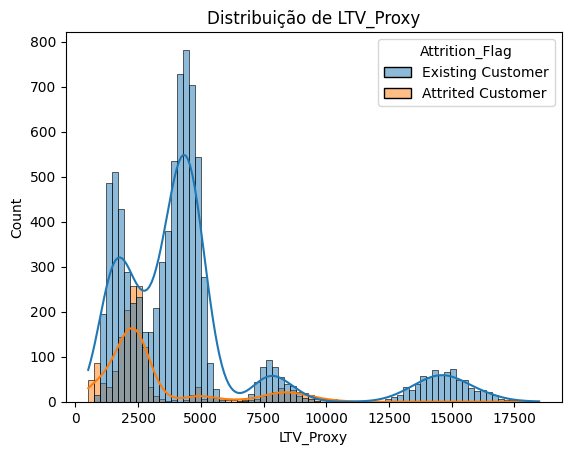

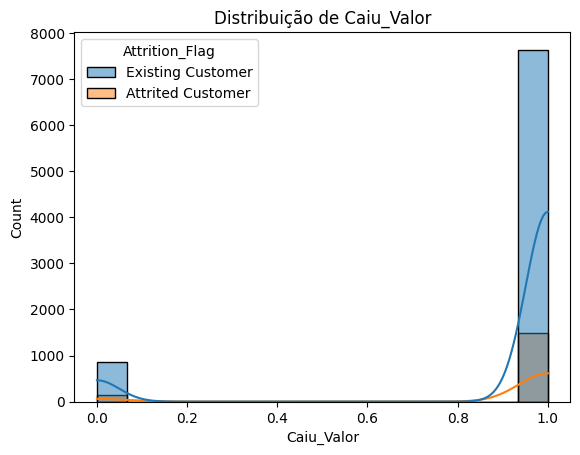

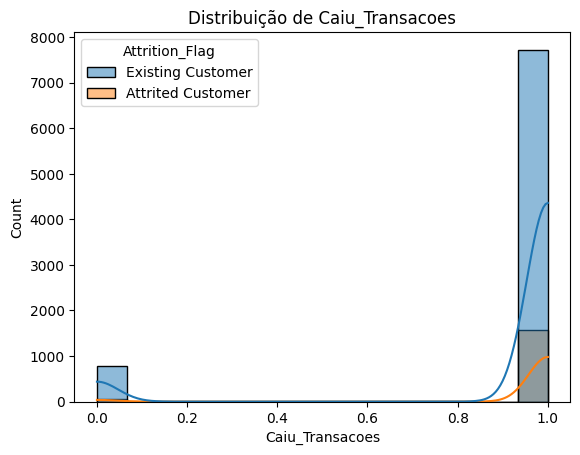

In [20]:
variaveis_numericas = [
    'Customer_Age', 'Dependent_count', 'Credit_Limit',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Ticket_Medio',
    'Gasto_Medio_Mensal', 'Rotativo_Ratio', 'Score_Relacionamento',
    'LTV_Proxy', 'Caiu_Valor', 'Caiu_Transacoes']

for var in variaveis_numericas:
    sns.histplot(data=df, x=var, hue="Attrition_Flag", kde=True)
    plt.title(f"Distribuição de {var}")
    plt.show()

# Etapa 5: Correlações

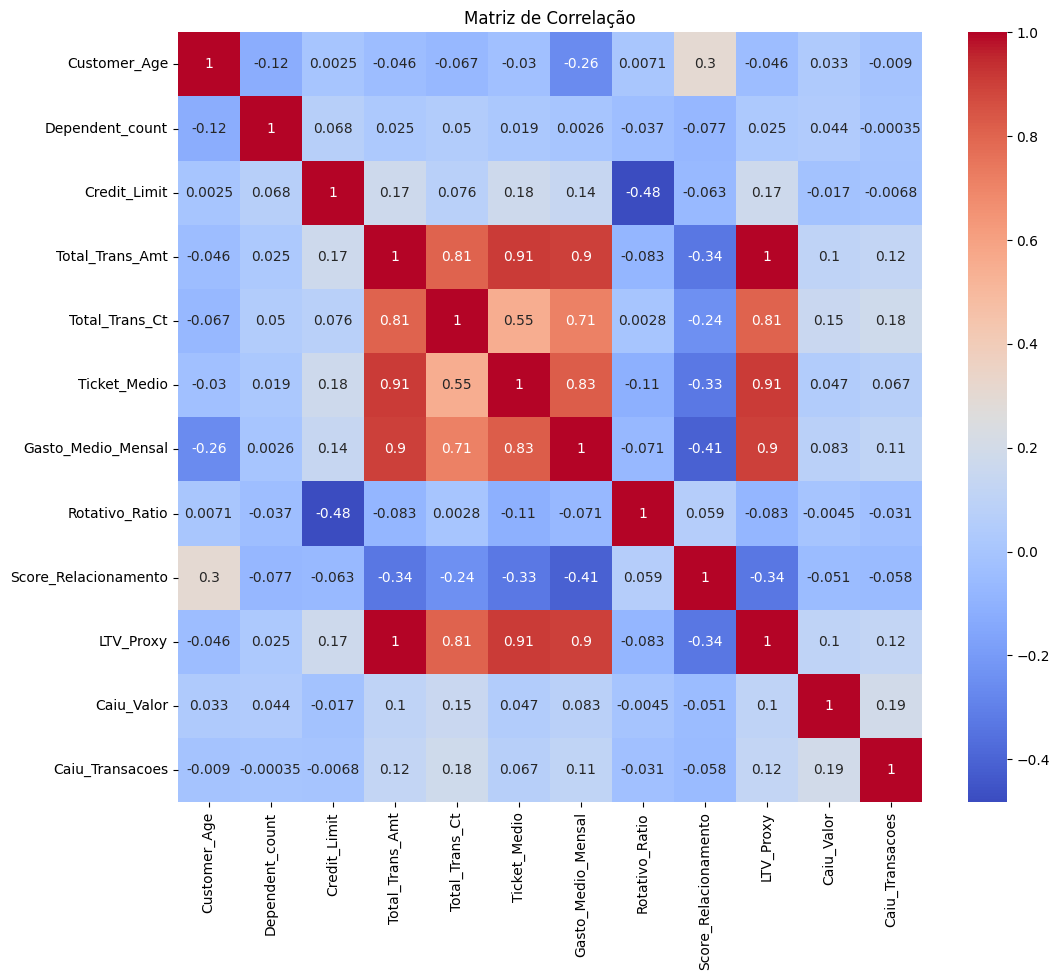

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df[variaveis_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Etapa 6: PCA para visualização

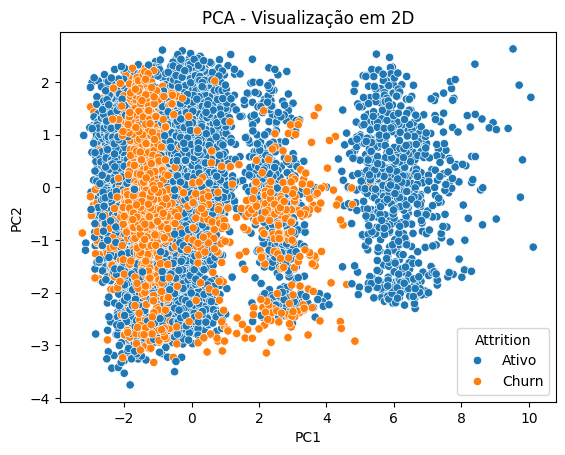

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[variaveis_numericas])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["Attrition"] = df["Attrition_Flag"].map({"Attrited Customer": "Churn", "Existing Customer": "Ativo"})

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Attrition")
plt.title("PCA - Visualização em 2D")
plt.show()

# Etapa 7: Clusterização com KMeans

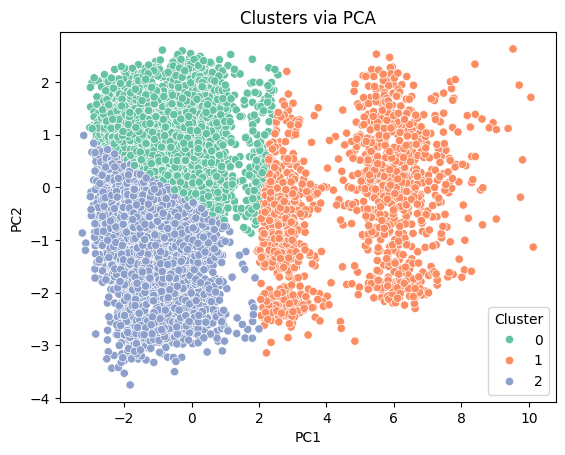

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(pca_result)

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title("Clusters via PCA")
plt.show()

# Etapa 8: Conclusão

In [24]:
print("\nResumo:\n- Classes estão desbalanceadas (16% churn).\n- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.\n- PCA e KMeans ajudam a visualizar agrupamentos.")



Resumo:
- Classes estão desbalanceadas (16% churn).
- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.
- PCA e KMeans ajudam a visualizar agrupamentos.
